In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Call the datasets

In [2]:
df = pd.read_csv('/Users/seungwooseo/Desktop/Python/Exercise/drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [91]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [92]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='count'>

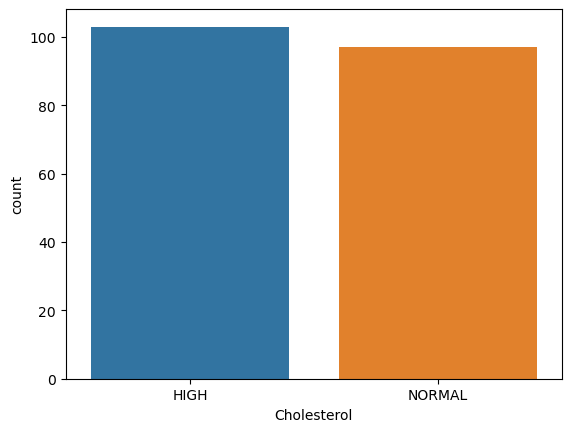

In [5]:
sns.countplot(data=df, x='Cholesterol') #Check the bias of dependent variables

### Prepare the SVM

In [57]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [40]:
scaler = StandardScaler()

### Encoding the categorical variables

In [77]:
X_categorical = df.drop(['Age','Cholesterol','Na_to_K'],axis=1)
X_categorical

,Sex,BP,Drug
0,F,HIGH,DrugY
1,M,LOW,drugC
2,M,LOW,drugC
3,F,NORMAL,drugX
4,F,LOW,DrugY
...,...,...,...
195,F,LOW,drugC
196,M,LOW,drugC
197,M,NORMAL,drugX
198,M,NORMAL,drugX


In [78]:
encoder = OneHotEncoder()

In [79]:
X_categorical = encoder.fit_transform(X_categorical)

### StadardScaler for numerical values

In [80]:
X_scaled = df[['Age','Na_to_K']]
X_scaled

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


In [81]:
X_scaled = scaler.fit_transform(X_scaled)

In [86]:
print(X_categorical.toarray().shape) #Sex - 2 / BP - 3 / Drug - 5 = 10

(200, 10)


In [93]:
X = np.hstack((X_categorical.toarray(), X_scaled))

In [94]:
X.shape 

(200, 12)

In [100]:
X = pd.DataFrame(X)

In [28]:
y = pd.DataFrame(data=df['Cholesterol'], columns=['Cholesterol'])
y

,Cholesterol
0,HIGH
1,HIGH
2,HIGH
3,HIGH
4,HIGH
...,...
195,HIGH
196,HIGH
197,HIGH
198,NORMAL


### Support Vector Machine

In [35]:
from sklearn import svm

In [53]:
clf = svm.SVC()

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
kf = KFold(n_splits=4) #Four-fold cross validation

In [102]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy = []
for train, test in kf.split(X):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        HIGH       0.66      0.66      0.66        29
      NORMAL       0.52      0.52      0.52        21

    accuracy                           0.60        50
   macro avg       0.59      0.59      0.59        50
weighted avg       0.60      0.60      0.60        50

              precision    recall  f1-score   support

        HIGH       0.65      0.54      0.59        24
      NORMAL       0.63      0.73      0.68        26

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.63        50
weighted avg       0.64      0.64      0.64        50

              precision    recall  f1-score   support

        HIGH       0.64      0.67      0.65        24
      NORMAL       0.68      0.65      0.67        26

    accuracy                           0.66        50
   macro avg       0.66      0.66      0.66        50
weighted avg       0.66      0.66      0.66        50

              preci

/opt/anaconda3/envs/testEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/testEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/testEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/testEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array w

In [112]:
svm_mean = np.mean(accuracy)
svm_mean

0.625

### Logistic Regression

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [114]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

#### Divide into Categorical and Numerical Independent variables

In [128]:
X_categorical = df.drop(['Age','Cholesterol','Na_to_K'],axis=1)
X_scaled = df[['Age','Na_to_K']]

In [129]:
encoder = OneHotEncoder()

In [130]:
X_categorical = encoder.fit_transform(X_categorical)

In [131]:
scaler = StandardScaler()

In [132]:
X_scaled = scaler.fit_transform(X_scaled)

In [133]:
X = np.hstack((X_categorical.toarray(), X_scaled))

In [134]:
y = pd.DataFrame(data=df['Cholesterol'], columns=['Cholesterol'])

### Run the code for Logistic Regression

In [137]:
accuracy_lr = []
for train, test in kf.split(X_lr):
    X_lr_train, X_lr_test = X[train], X[test]
    y_lr_train, y_lr_test = y.iloc[train], y.iloc[test]
    
    pipeline.fit(X_lr_train, y_lr_train)
    
    predictions = pipeline.predict(X_lr_test)
    
    accuracy_tmp = accuracy_score(y_lr_test, predictions)
    accuracy_lr.append(accuracy_tmp)
    

/opt/anaconda3/envs/testEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/testEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/testEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/testEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array w

In [140]:
np.mean(accuracy_lr)

0.59